In [2]:
### Pick the file directory
directory = '/media/ab/data/Research_Data/Enhancers/ConservationScores/fullConScores/'
#directory = '/media/ab/data/Research_Data/Enhancers/BedFiles/sorted/conScores/'

Starting file  7.TP53Motifs_P53_ChIP-Seq_Bidirectionals.fullConScores.joined.bedgraph
Loading the data ...
Data loaded
Finding max region length ...
Max length:  15
Starting the metagene ...
15
position:  ('chr7', '158611638', '158611653')
Index out of range! Value  15  is outide the range 0 to  15
pos_list:  [158611652 158611653]   i:  158611653
position:  ('chr8', '143897249', '143897264')
Index out of range! Value  15  is outide the range 0 to  15
pos_list:  [143897263 143897264]   i:  143897264
position:  ('chr4', '41146995', '41147010')
Index out of range! Value  15  is outide the range 0 to  15
pos_list:  [41147008 41147009 41147010]   i:  41147010
position:  ('chr6', '151178475', '151178490')
Index out of range! Value  15  is outide the range 0 to  15
pos_list:  [151178489 151178490 151178491]   i:  151178490
position:  ('chr6', '151178475', '151178490')
Index out of range! Value  16  is outide the range 0 to  15
pos_list:  [151178489 151178490 151178491]   i:  151178491
positio

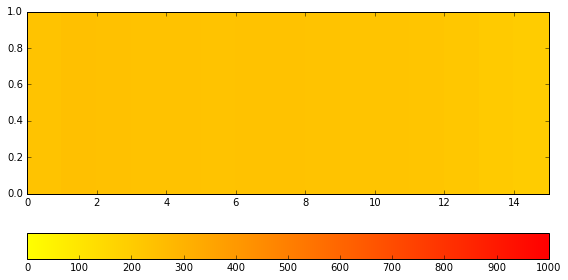

Heatmap made
File  7.TP53Motifs_P53_ChIP-Seq_Bidirectionals.fullConScores.joined.bedgraph  complete


SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [5]:
### This cell imports the data from a text file that contains the distances between features and sorts them
### by chromosome. It creates a histogram for each chromosome that shows the distances between the features. 

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
import time
import sys
from scipy import stats
import matplotlib.ticker as mtick


def main():  
    file_filter = '7.TP53Motifs_P53_ChIP-Seq_Bidirectionals.fullConScores.joined.bedgraph'
    #file_filter = '.bedgraph'
    #file_labels = []
    dir_list = sorted(os.listdir(directory))
    #print dir_list
    for filename in dir_list:
        #data_dict = dict()
        if filename[-(len(file_filter)):] == file_filter:      ### Load only the TSV files
            print "Starting file ", filename
            data_dict = load_from_file(directory+filename)
            max_length = find_max_length(data_dict.keys())
            metagene = make_metagene(data_dict, max_length)
            make_graphs(metagene, filename, max_length)
            print "File ", filename, " complete"
            #print data_dict

def make_metagene(data_dict, max_length):
    
    print "Starting the metagene ..."
    meta_gene = [[] for x in range(max_length)]
    print len(meta_gene)
    #meta_gene = np.zeros(max_length)
    for position in data_dict.keys():
        #print "Processing the position: ", position
        middle = find_middle(int(position[1]),int(position[2]))
        for score in data_dict[position]:
            pos_list = np.arange(int(score[0]), int(score[1]),1)
            for i in pos_list:
                q = (int(max_length/2)) + (i - middle)
                #print q, score[2]
                try:
                    meta_gene[q].append(np.around(int(float(score[2])*1000)))
                except:
                    print "position: ", position
                    print "Index out of range! Value ", q, " is outide the range 0 to ", max_length
                    print "pos_list: ", pos_list, "  i: ", i
                    time.sleep(600)
            #print meta_gene
        
    
    avg_meta_gene = ""
    for x in meta_gene:       
        if len(avg_meta_gene) == 0:
            avg_meta_gene = [np.mean(x)]
        else:
            avg_meta_gene.append(np.mean(x))
    print "Meta gene complete"
    #print avg_meta_gene
    return avg_meta_gene
        
def find_middle(start, end):
    return int((start+end)/2)
            
def find_max_length(positions):
    length = 0
    print "Finding max region length ..."
    for x in positions:
        y = int(x[2]) - int(x[1])
        if y > length:
            length = y
    print "Max length: ", length
    return length
            
def load_from_file(file_to_open):              
    
    chr_col = 0
    start_col = 1
    end_col = 2
    con_start_col = 4
    con_end_col = 5
    con_value_col = 6
    old_position = ("","","")
    scores = ("","","")
    data_dict = dict()
    print "Loading the data ..."
    x = open(file_to_open)   ### Open the file
    #data = []                    ### Initiate the data list
    for line in x:               ### For each line in the file 
        split_line = (line.strip('\n').split('\t'))    # Split the line
        new_position = (split_line[chr_col],split_line[start_col],split_line[end_col])
        scores = (split_line[con_start_col],split_line[con_end_col],split_line[con_value_col])
        if new_position == old_position:                            # Check if data is valid
            data_dict[new_position].append(scores)               # if valid, append to data
        else:
            data_dict[new_position] = [scores]         # if invalid, count invalid data points
        old_position = new_position
    #print "positions with no score" = ", nonvalues                    # print invalid data points
    x.close()                                       # close open file 
    print "Data loaded"
    return data_dict     
    
    
    '''    
    chr_col = 0
    start_col = 1
    end_col = 2
    con_start_col = 4
    con_end_col = 5
    con_value_col = 6
    position = ("","","")
    scores = ("","","")
    data_dict = dict()
    print "Loading the data ..."
    x = open(file_to_open)   ### Open the file
    #data = []                    ### Initiate the data list
    for line in x:               ### For each line in the file 
        split_line = (line.strip('\n').split('\t'))    # Split the line
        position = (split_line[chr_col],split_line[start_col],split_line[end_col])
        scores = (split_line[con_start_col],split_line[con_end_col],split_line[con_value_col])
        if position in data_dict.keys():                            # Check if data is valid
            data_dict[position].append(scores)               # if valid, append to data
        else:
            data_dict[position] = [scores]         # if invalid, count invalid data points
    #print "positions with no score" = ", nonvalues                    # print invalid data points
    x.close()                                       # close open file 
    print "Data loaded"
    return data_dict                                       # return data from file'''

def make_graphs(data, filename, length):
    
    #num_files = len(data_labels)
    #print "Directory: ", directory
    #print "Number of files: ", num_files
    print "Making the heatmap ..."
    #print data
    data = [data]
    #avgs = []
    #stats = []
    #for i in all_data:
    #    #avgs.append(sum(i)/len(i))
    #    stats.append("N = "+str(len(i))+"; Mean = "+str( round(  (sum(i)/len(i)),3  )) +
    #                 "; Median = " + str(round(np.median(i), 3)))
    #print avgs
    #print ns
    
    ### Make the subplot for the boxplot
    fig, axs = plt.subplots(figsize=(8, 4))
    
    ### Make the boxplot
    hm = plt.pcolor(data, cmap='autumn_r', vmin=0, vmax=1000)
    
    top = length
    bottom = 0
    axs.set_xlim(bottom, top)
    
    '''
    ### Set the left axis parameters
    top = 1
    bottom = 0
    axs.set_xlim(bottom, top)
    axs.set_ylim(0.5, num_files + 0.5)
    axs.invert_yaxis()
    
    ### Set the left axis labels
    ytickNames = plt.setp(axs, yticklabels=(q[:] for q in data_labels))
    plt.setp(ytickNames, rotation=0, fontsize=12)
    
    ### Make the right axis for the N labels
    ax2 = axs.twinx()
    
    ### Invert the right axis to match the left axis
    ax2.invert_yaxis()

    ### Find the tick positions of the left axis and use them to set positions for right axis
    ax2_tickpos = axs.get_yticks()
    ax2.set_yticks(ax2_tickpos)
    ax2.set_ybound(axs.get_ybound())
    ax2.set_yticklabels(stats)
    '''
    
    
    ### Show the boxplot
    plt.colorbar(hm, orientation='horizontal')
    plt.tight_layout()
    print filename, length
    plt.show()
    print "Heatmap made"                    

if __name__ == "__main__":
    sys.exit(main())